In [124]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet


In [125]:
md = pd. read_csv('/content/tmdb_movies_data.csv')
md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [126]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [127]:
rows, columns = md.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 10866
Number of columns: 21


In [128]:
md.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [129]:
#removing unwanted columns
md.drop(['imdb_id', 'homepage', 'tagline', 'overview','budget_adj','revenue_adj','keywords'], axis=1, inplace=True)


In [130]:
md.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [131]:
#changing format of some attributes
md['release_date'] = pd.to_datetime(md['release_date'])
md['release_date'].head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [132]:
md.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [133]:
#using lambda to convert the time into more generalised format
md.runtime = md.runtime.apply(lambda x: '{:02d}h: {:02d}m'.format(*divmod(x, 60)))
md.runtime

0        02h: 04m
1        02h: 00m
2        01h: 59m
3        02h: 16m
4        02h: 17m
           ...   
10861    01h: 35m
10862    02h: 56m
10863    01h: 34m
10864    01h: 20m
10865    01h: 14m
Name: runtime, Length: 10866, dtype: object

In [134]:
md.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,02h: 04m,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,02h: 00m,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,01h: 59m,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,02h: 16m,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,02h: 17m,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015



Data Cleaning
Checking for Duplicate Values


In [135]:
#checking duplicates

md[md.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,01h: 32m,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010


In [136]:
#only have one duplicate so removing it
md.drop_duplicates(keep='first',inplace=True)

In [137]:
# checking again
md[md.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


Checking for Missing Values

In [138]:
md.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [139]:
md.fillna('unknown', inplace=True)

In [140]:
#checking the missing values in the dataframe
md.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [141]:
#assessing number of rows and columns after cleaning the dataset
print("There are {} Rows and {} Columns after removing missing values".format(md.shape[0], md.shape[1]))

There are 10865 Rows and 14 Columns after removing missing values


the number of columns get reduced, as we have removed the columns which are not required for further analysis

 top 10 grossing movies?

In [142]:
# to calculate top profitable movies, production companies
# we have to create profit column

md['profit']= md['revenue'] - md ['budget']

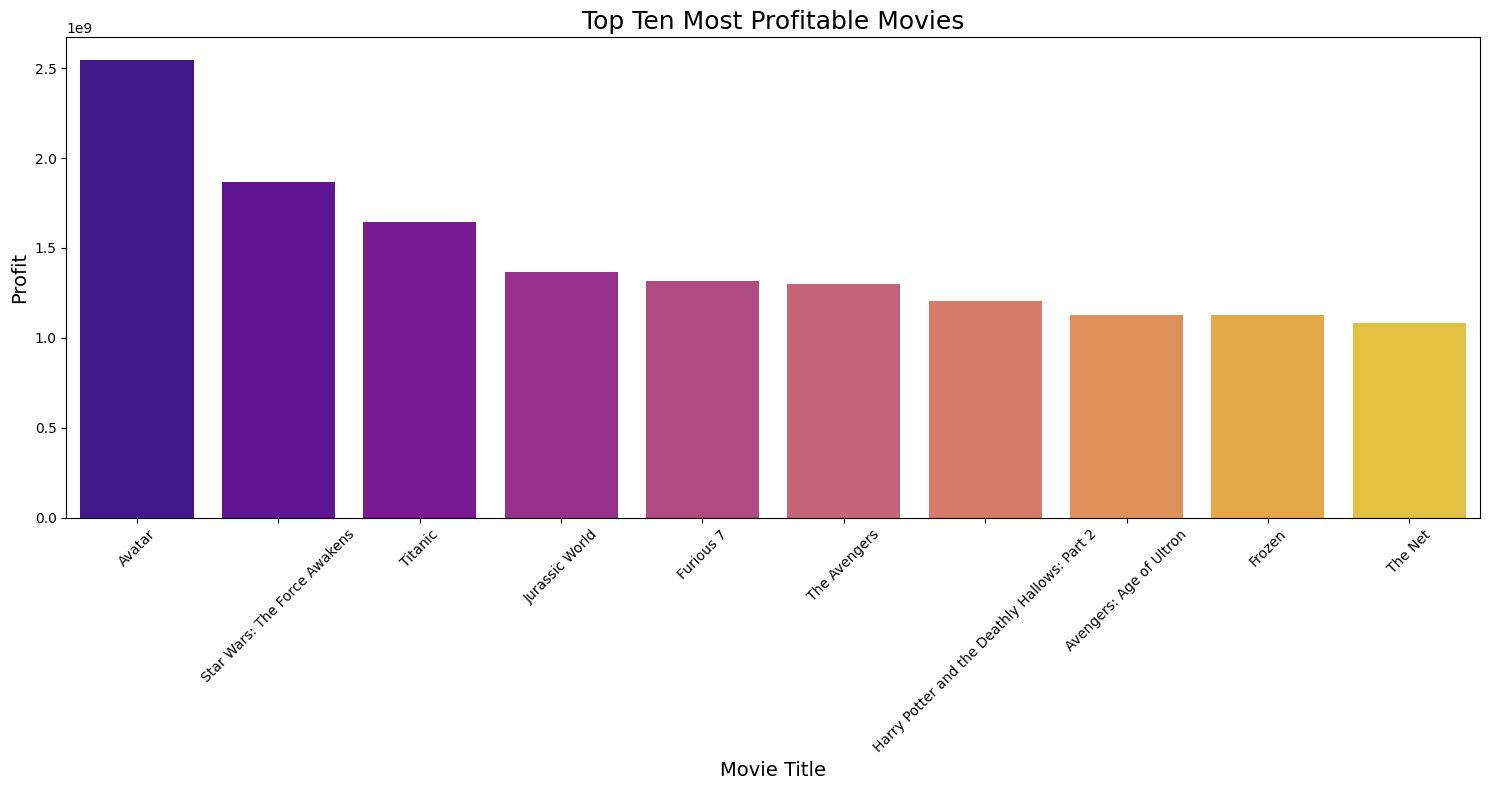

In [143]:
# Sort movies based on profitability (top 10 movies)
sort_p_movies = md.sort_values(by='profit', ascending=False).head(10)

# Plot the top 10 most profitable movies
plt.figure(figsize=(15, 8))
sns.barplot(x=sort_p_movies['original_title'], y=sort_p_movies['profit'], palette='plasma')
plt.xticks(rotation=45)
plt.title('Top Ten Most Profitable Movies', fontsize = 18)
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Profit', fontsize = 14)
plt.tight_layout()
plt.show()

In [144]:
# Grouping by the Director and calculating the average review and count of movies

director_rating = md.groupby('director').agg({'vote_average': 'mean', 'id': 'count'}).rename(columns={'id': 'movie_count'}) #agg() function used for the applying multiple aggregation and rename to make the data more understanding

# Removing the directors with less than 7 movies
directorLimit = director_rating[director_rating['movie_count'] > 7]

# Sort directors by average rating in descending order to get the top rated directors accordingly

top_director = directorLimit.sort_values(by='vote_average', ascending=False).head(15)

top_director[['vote_average']]

,vote_average
director,
Christopher Nolan,7.470000
Stanley Kubrick,7.388889
Quentin Tarantino,7.354545
Wes Anderson,7.225000
David Fincher,7.210000
Joel Coen,7.060000
Paul Thomas Anderson,7.037500
Peter Jackson,7.000000
Martin Scorsese,6.958621


In [145]:
# Excluding the 'unknown' values from the column
top_director = top_director[top_director.index != 'unknown']

# Getting the top 15 Directors
top_director_new = top_director.head(15)

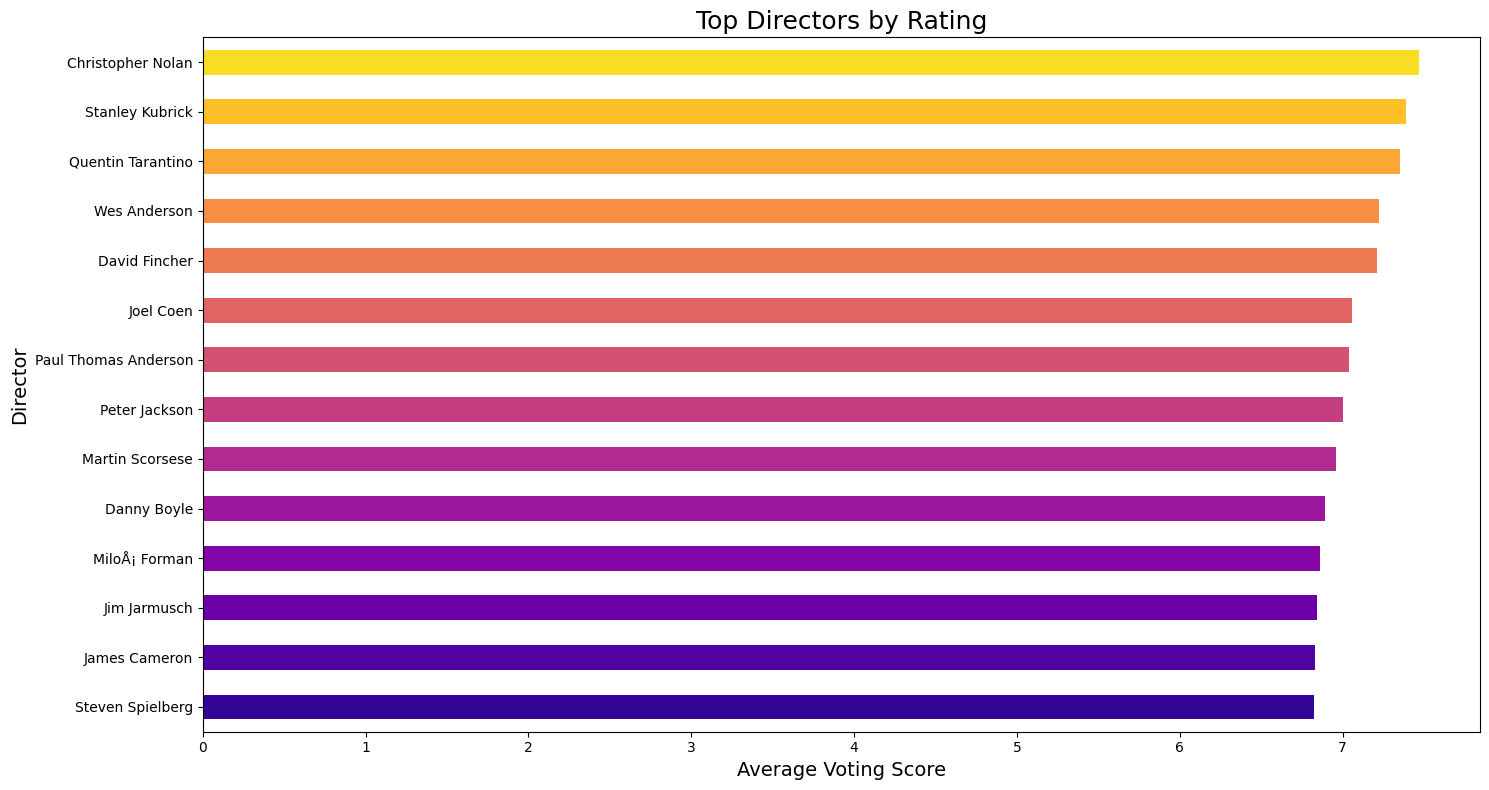

In [146]:
# Plotting the average voting scores for the top directors
plt.figure(figsize=(15, 8))
top_director['vote_average'].sort_values().plot(kind='barh', color=sns.color_palette("plasma", len(top_director)))
plt.title('Top Directors by Rating', fontsize=18)
plt.xlabel('Average Voting Score', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()
plt.show()

 top production companies?¶

In [147]:
# Splitting the production companies column and exploding it to count the companies accordingly
production_companies = md['production_companies'].str.split('|').explode()

# Counting the number of movies produced by all companies
production_companies = production_companies.value_counts()

# The top 10 production companies
production_companies.head(10)

unknown                                   1030
Universal Pictures                         522
Warner Bros.                               509
Paramount Pictures                         431
Twentieth Century Fox Film Corporation     282
Columbia Pictures                          272
New Line Cinema                            219
Metro-Goldwyn-Mayer (MGM)                  218
Walt Disney Pictures                       214
Touchstone Pictures                        178
Name: production_companies, dtype: int64

In [148]:
# Excluding the 'unknown' values from the column
production_companies = production_companies[production_companies.index != 'unknown']

# Getting the top 7 production companies
top_production_companies = production_companies.head(7)

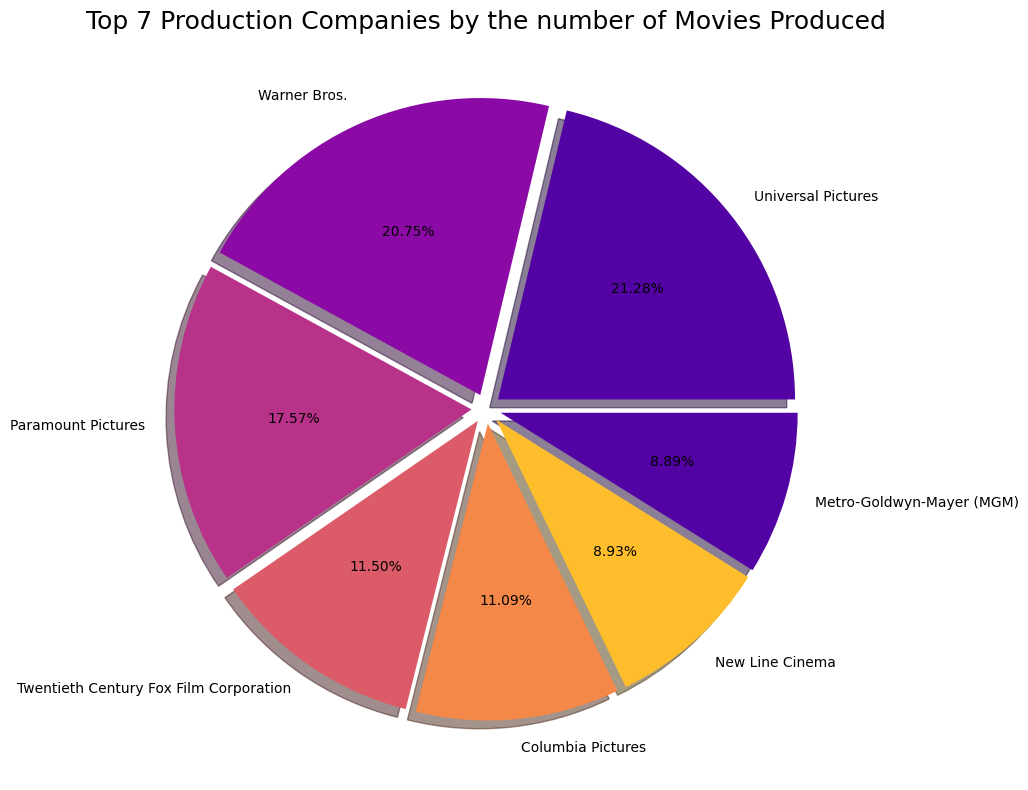

In [149]:
# Plotting

# Pie chart parameters
colors = sns.color_palette("plasma")
explodes = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  # explode the first three slices for emphasis
sizes = top_production_companies.values
labels = top_production_companies.index

# Plotting the pie chart
plt.figure(figsize=(15, 8))
plt.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=0, shadow=True)
plt.title('Top 7 Production Companies by the number of Movies Produced', fontsize=18)
plt.tight_layout()
plt.show()

 Which months has witnessed the most popular movies, is there any relation between them?

In [151]:
# Convert the 'release_date' column to datetime format and extract the month
md['release_date'] = md['release_date'].dt.month

In [152]:
# Grouping the movies by release month and using the mean function to calculate the average
average_popularity = md.groupby('release_date')['popularity'].mean()

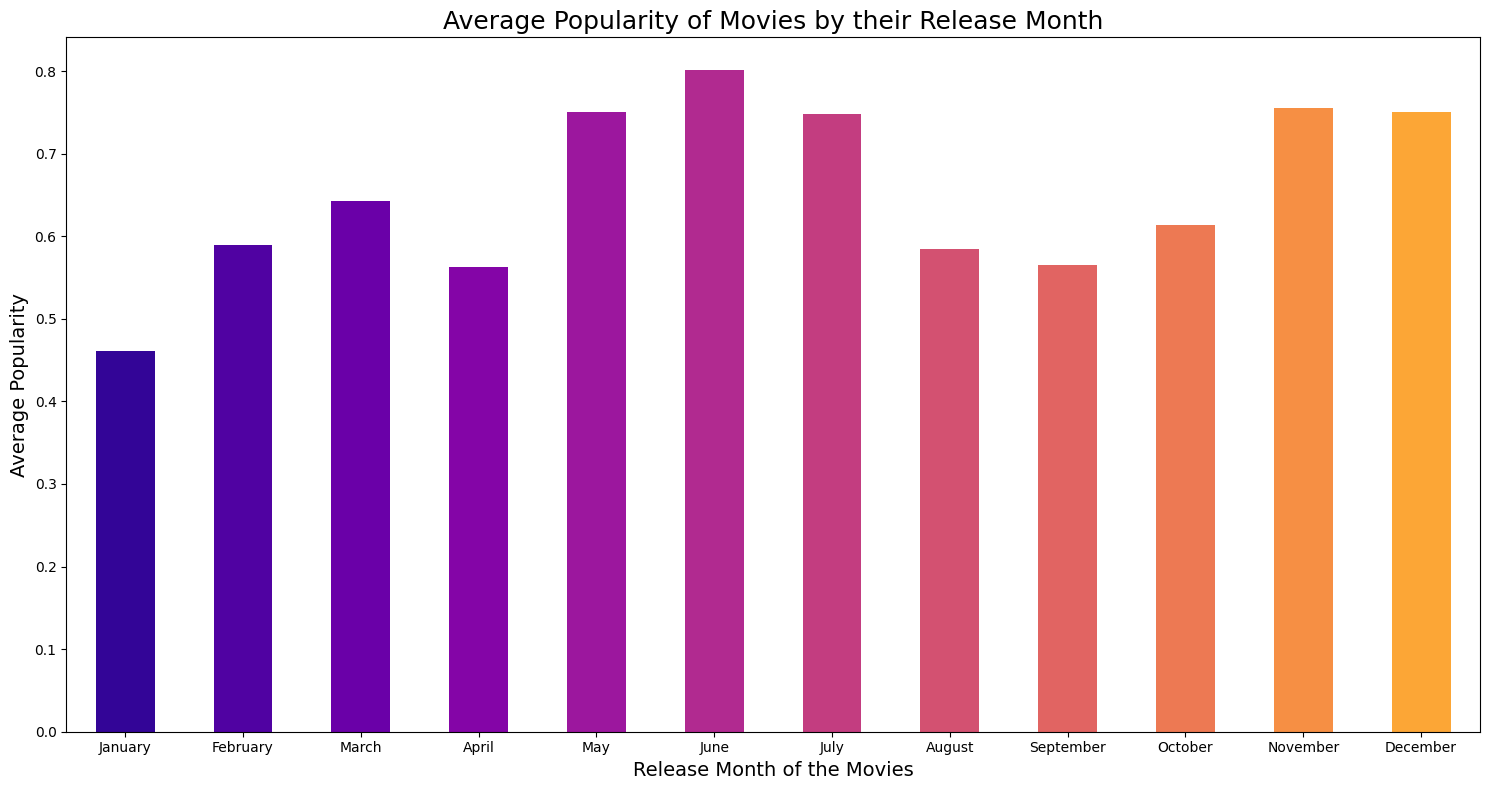

In [153]:
# Plotting average popularity by release month
plt.figure(figsize=(15, 8))
average_popularity.plot(kind='bar', color=sns.color_palette("plasma", 14))
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.title('Average Popularity of Movies by their Release Month', fontsize=18)
plt.ylabel('Average Popularity', fontsize=14)
plt.xlabel('Release Month of the Movies', fontsize=14)
plt.xticks(range(12), month, rotation=0)
plt.tight_layout()
plt.show()


Is there any relation between Budget and the revenue of the movies?

In [155]:
# Calculating the correlation between budget and revenue
correlation_coef = md['budget'].corr(md['revenue']) # corr() function is used to calculate the correlation coefficient
print (correlation_coef)

0.7349279812889292


The correlation coefficient between the Budget and Revenue is 0.73, which indicates a strong positive correlation which means if the budget of the movies are increased or is more, it is them likely that the revenue of the movie is increased or more.¶

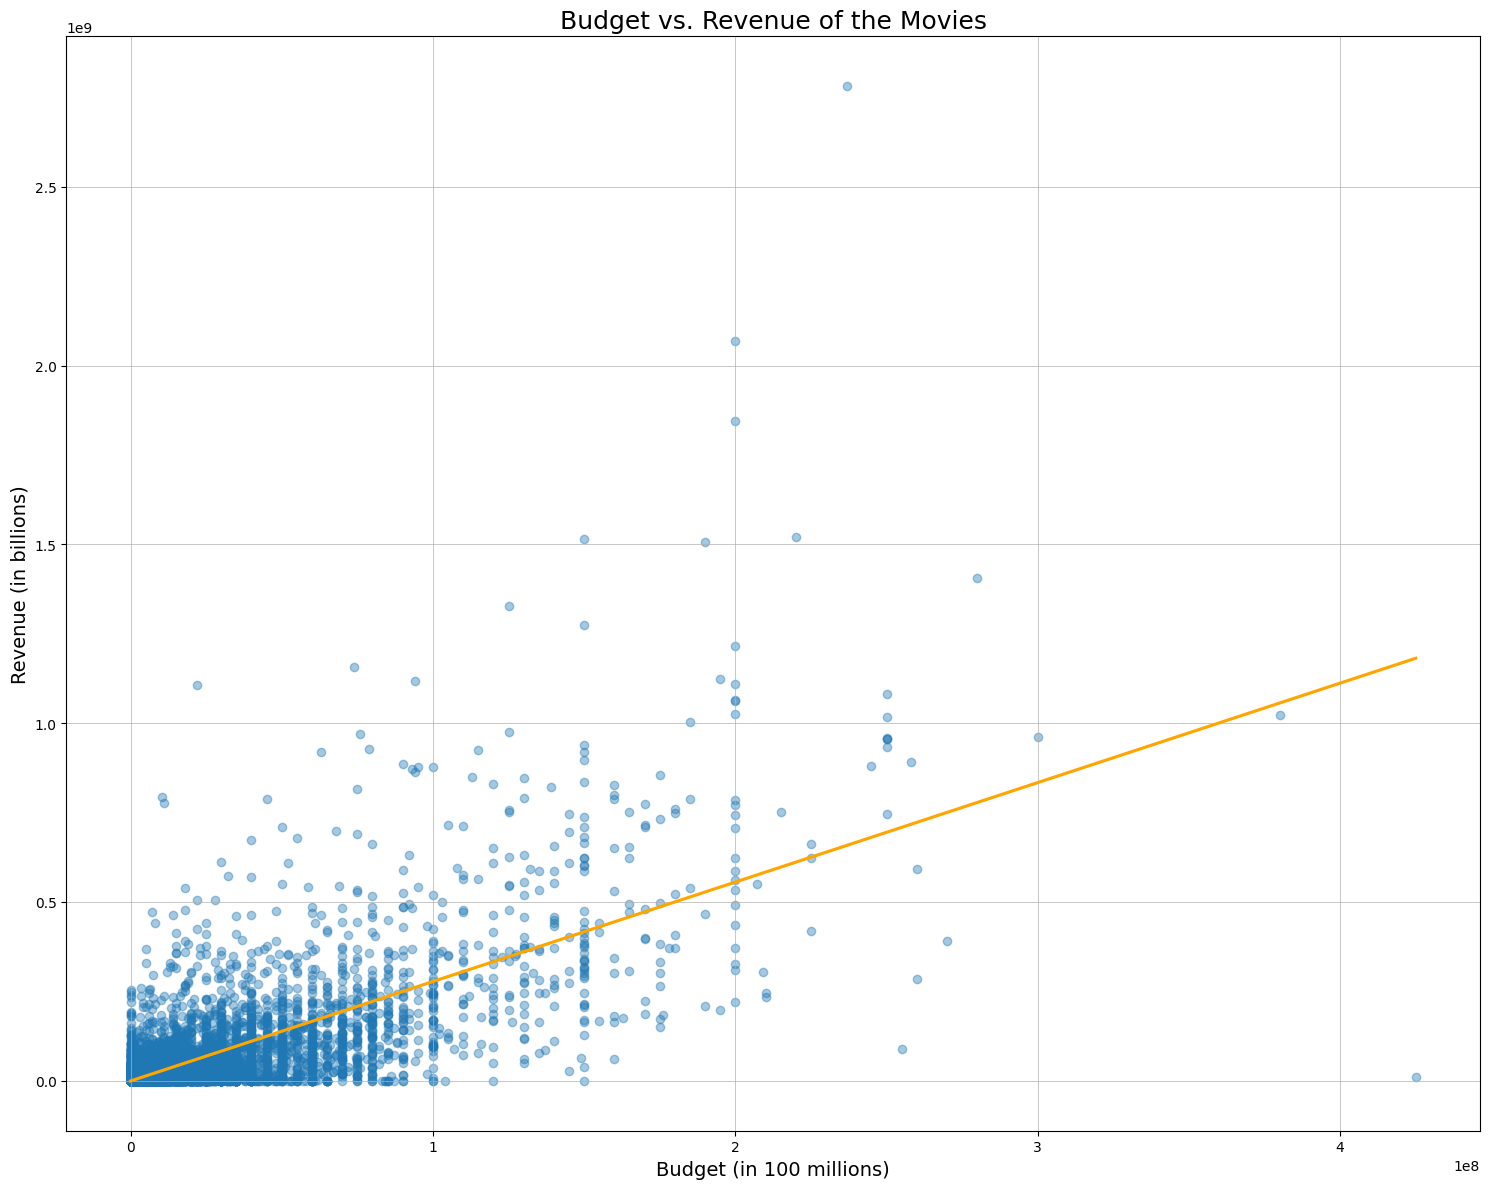

In [157]:
# Scatter plot with regression line for Budget vs Revenue
plt.figure(figsize=(15, 12))
sns.regplot(x=md['budget'], y=md['revenue'], scatter_kws={'alpha':0.4}, line_kws={'color':'orange'}, ci=None)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.title('Budget vs. Revenue of the Movies', fontsize=18)
plt.xlabel('Budget (in 100 millions)', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.tight_layout()
plt.show()